In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Getting the data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
housing.shape

(20640, 10)

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


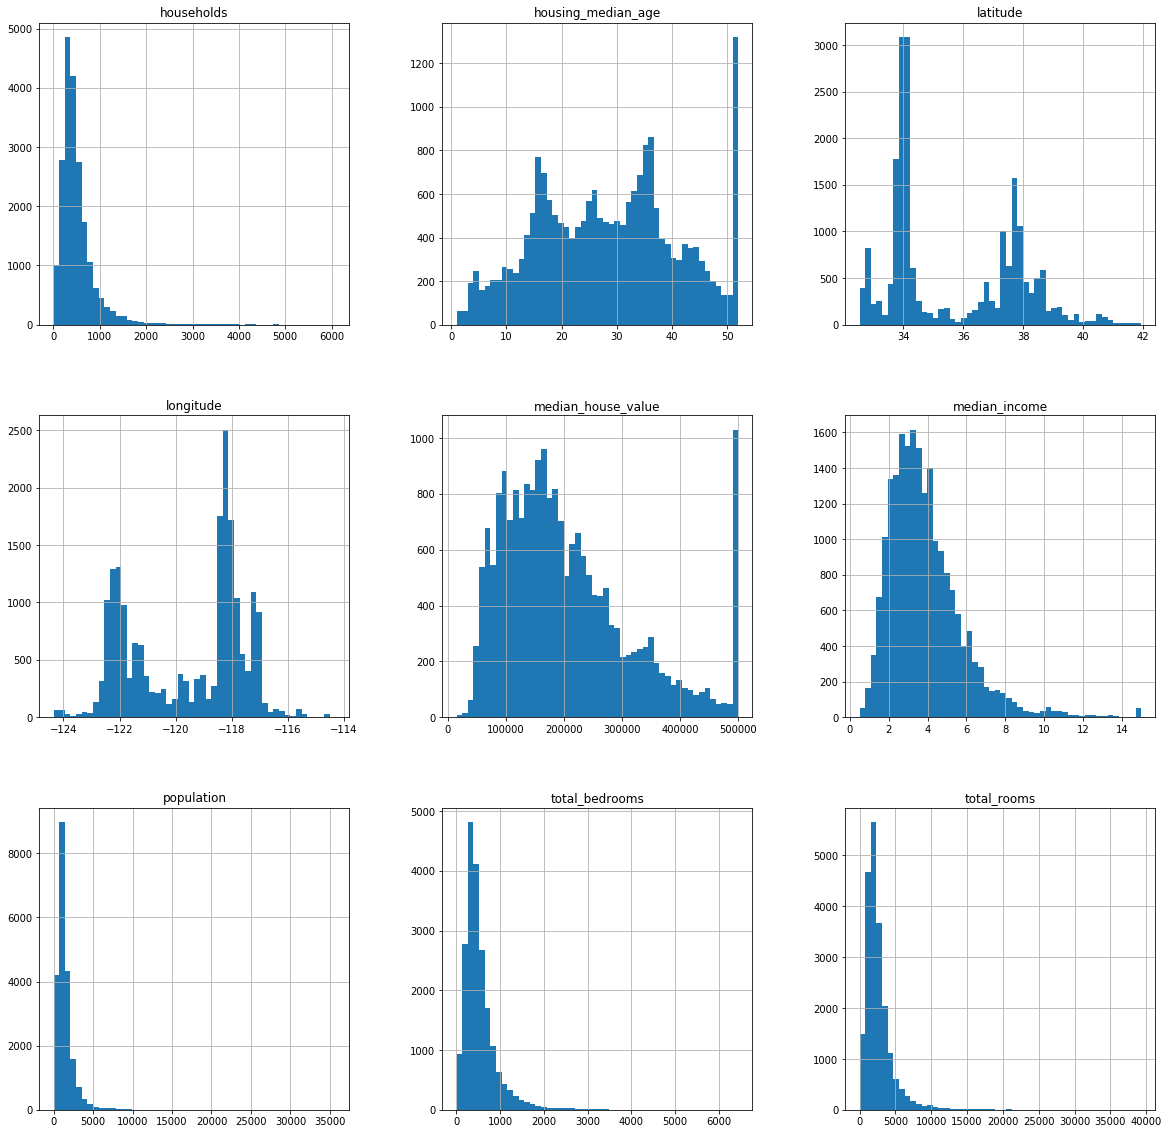

In [8]:
housing.hist(bins=50, figsize=(20,20))
plt.show()

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

### ocean proximity is in string

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [12]:
housing.dropna(inplace=True)

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# median income should be in category

we use pd.cut() method to set the continuos data into category

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

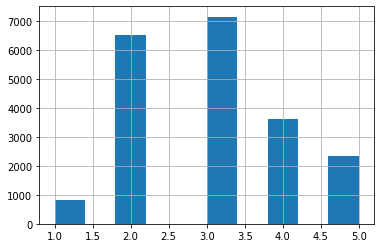

In [16]:
housing["income_cat"].hist()

##  Now split the data into income based classes

In [86]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)#belonging_to_income_class

3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: income_cat, dtype: float64

In [19]:
strat_test_set.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18143    -122.06     37.34                20.0       3435.0           593.0   
8101     -118.21     33.80                41.0       1251.0           279.0   
8313     -118.13     33.77                37.0       4365.0           926.0   
8365     -118.35     33.97                26.0       1725.0           431.0   
13188    -117.70     34.09                25.0       1719.0           331.0   
...          ...       ...                 ...          ...             ...   
10311    -117.77     33.88                 8.0       4874.0           627.0   
12449    -114.68     33.49                20.0       1491.0           360.0   
3899     -118.52     34.21                36.0       1328.0           287.0   
12715    -121.39     38.58                41.0       2577.0           365.0   
3707     -118.39     34.20                19.0       2012.0           732.0   

       population  ho

In [20]:
for x in (strat_train_set, strat_test_set):
    x.drop("income_cat", axis=1, inplace=True)

C:\Users\Ankita\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
strat_train_set.shape

(16346, 10)

## DATA EXPLORATION

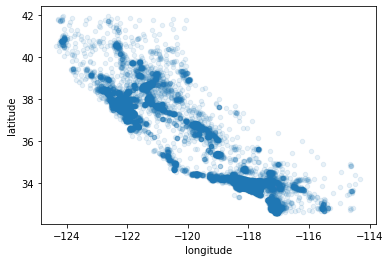

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

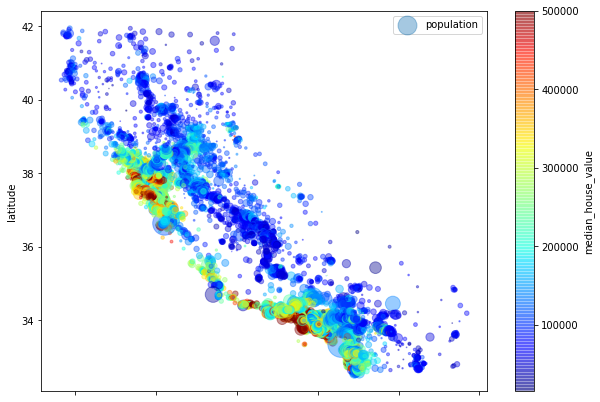

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/50, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## We are trying to find the correlation between a column and other attributes

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FD0BF35C8>,
      dtype=object)

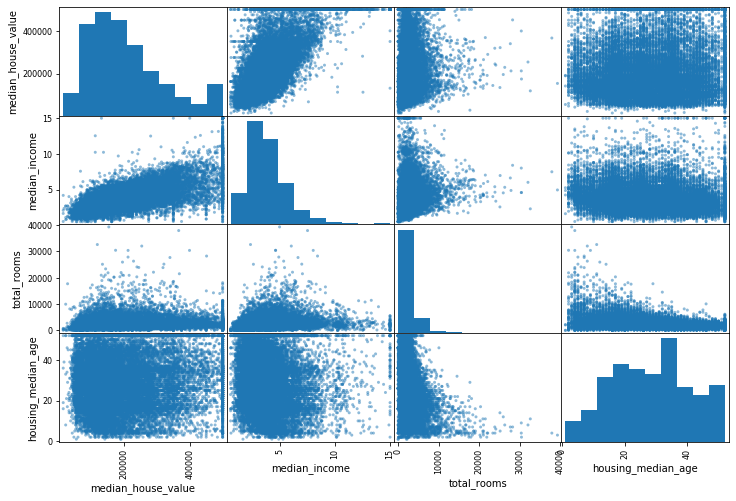

In [27]:
#usingpandas
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [28]:
median = housing["total_bedrooms"].median()#we are changing the missing values with the median 

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")# We are assigning median value to to a variable

In [30]:
housing_num = housing.drop("ocean_proximity", axis=1) # creating a copy of data as ocean proximity is a string value we cannot add mediasn value to it

In [31]:
imputer.fit(housing_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
 # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
housing_num.shape

(20433, 10)

In [34]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5365e+00,  1.7970e+05,  3.0000e+00])

In [35]:
X = imputer.transform(housing_num)

now we will convert the string input to a numerical input

In [36]:
housing_cat = housing[["ocean_proximity"]]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20433x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20433 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [42]:
housing_prepared_set, housing_prepared_test_set = train_test_split(
    housing_prepared, test_size=0.2, random_state=42, stratify=housing["income_cat"])

## Trying Different models to test their accuracy

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_set, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
housing_prepared_set.shape

(16346, 18)

In [45]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [452600. 358500. 352100. 341300. 342200.]


In [46]:
print("Labels:", list(some_labels))

Labels: [500001.0, 270300.0, 161200.0, 273700.0, 242200.0]


In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared_set)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8.645862744662815e-11

In [48]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

5.910502605173939e-11

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared_set, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [50]:
housing_predictions = tree_reg.predict(housing_prepared_set)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared_set, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [326.22856662  82.13511655  92.13737915 111.04177245 103.9583544
 217.56928103 100.39700874 120.85223941 103.99016054 136.66781104]
Mean: 139.49776899180097
Standard deviation: 71.91324639449233


In [53]:
lin_scores = cross_val_score(lin_reg, housing_prepared_set, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.49860907e-10 1.79861926e-10 1.10749265e-10 2.21344109e-10
 1.53902043e-10 3.45760440e-10 1.74969590e-10 8.89765655e-11
 1.72870527e-10 1.65656666e-10]
Mean: 1.8639520378574124e-10
Standard deviation: 6.906615440175105e-11


In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared_set, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [55]:
housing_predictions = forest_reg.predict(housing_prepared_set)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

27.25574346655841

In [56]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared_set, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [227.11599568  45.51298501  55.55377338  62.89565654  51.89732692
 149.12852395  50.16152497  61.28564575  53.34783036  76.64004637]
Mean: 83.35393089358385
Standard deviation: 55.803996777483796


In [58]:
scores = cross_val_score(lin_reg, housing_prepared_set, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.863952e-10
std      7.280212e-11
min      8.897657e-11
25%      1.568407e-10
50%      1.739201e-10
75%      2.109736e-10
max      3.457604e-10
dtype: float64

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared_set, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared_set)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared_set, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [64]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

35145.40257268486 {'max_features': 2, 'n_estimators': 3}
26410.735194687233 {'max_features': 2, 'n_estimators': 10}
22730.9033613224 {'max_features': 2, 'n_estimators': 30}
20892.02118178527 {'max_features': 4, 'n_estimators': 3}
15088.174691230672 {'max_features': 4, 'n_estimators': 10}
12542.917740564415 {'max_features': 4, 'n_estimators': 30}
13846.646574520408 {'max_features': 6, 'n_estimators': 3}
8855.351191754535 {'max_features': 6, 'n_estimators': 10}
6445.115098356518 {'max_features': 6, 'n_estimators': 30}
7409.826716961633 {'max_features': 8, 'n_estimators': 3}
4449.457672425883 {'max_features': 8, 'n_estimators': 10}
3562.624840952064 {'max_features': 8, 'n_estimators': 30}
32607.649146264208 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
26305.729560387423 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
26733.82713466866 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
18057.43362248252 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [67]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092869,0.005087,0.004840,0.005893,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.466395e+09,-1.046307e+09,...,-1.235199e+09,1.552018e+08,18,-4.619956e+08,-3.323244e+08,-4.213026e+08,-3.569960e+08,-3.530870e+08,-3.851411e+08,4.862815e+07
1,0.287557,0.005396,0.014440,0.003647,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-7.294791e+08,-5.984551e+08,...,-6.975269e+08,5.710160e+07,15,-1.687449e+08,-1.448053e+08,-1.635249e+08,-1.713428e+08,-1.557217e+08,-1.608279e+08,9.626156e+06
2,0.881130,0.007842,0.035601,0.003505,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-5.268615e+08,-5.367390e+08,...,-5.166940e+08,2.211012e+07,13,-9.547494e+07,-9.516601e+07,-8.993497e+07,-9.246840e+07,-9.009348e+07,-9.262756e+07,2.376899e+06
3,0.131282,0.001284,0.005249,0.003508,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-5.697636e+08,-4.100155e+08,...,-4.364765e+08,7.469346e+07,12,-1.866364e+08,-1.549650e+08,-1.478377e+08,-1.194126e+08,-1.365904e+08,-1.490884e+08,2.228365e+07
4,0.434195,0.005016,0.012145,0.003120,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.368012e+08,-2.255091e+08,...,-2.276530e+08,1.322827e+07,9,-6.315517e+07,-6.236058e+07,-5.652742e+07,-6.352551e+07,-5.496937e+07,-6.010761e+07,3.612889e+06
5,1.344219,0.015618,0.032820,0.002973,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.444154e+08,-1.602281e+08,...,-1.573248e+08,8.319864e+06,6,-2.960781e+07,-3.197857e+07,-3.132891e+07,-3.135584e+07,-3.042436e+07,-3.093910e+07,8.298675e+05
6,0.179327,0.006872,0.004454,0.004673,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.060213e+08,-1.579436e+08,...,-1.917296e+08,1.896060e+07,8,-6.626628e+07,-5.257067e+07,-6.254204e+07,-7.053567e+07,-5.811160e+07,-6.200525e+07,6.251151e+06
7,0.622152,0.025590,0.009596,0.005208,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-8.512658e+07,-6.199449e+07,...,-7.841724e+07,1.465713e+07,5,-2.391545e+07,-1.620134e+07,-1.780976e+07,-2.539383e+07,-2.608174e+07,-2.188042e+07,4.073297e+06
8,1.782988,0.053286,0.032306,0.004013,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-3.927054e+07,-3.929628e+07,...,-4.153951e+07,1.990472e+06,3,-9.525148e+06,-8.971630e+06,-9.551658e+06,-9.397942e+06,-1.009128e+07,-9.507531e+06,3.583906e+05
9,0.233349,0.010440,0.000411,0.000823,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-6.212427e+07,-3.765578e+07,...,-5.490553e+07,1.446444e+07,4,-1.669828e+07,-1.300271e+07,-2.346746e+07,-1.106868e+07,-2.483325e+07,-1.781408e+07,5.497712e+06


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared_set, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3564.954516933705 {'max_features': 7, 'n_estimators': 180}
8742.220282520646 {'max_features': 5, 'n_estimators': 15}
14680.465154171996 {'max_features': 3, 'n_estimators': 72}
8153.934764637583 {'max_features': 5, 'n_estimators': 21}
3666.798167680308 {'max_features': 7, 'n_estimators': 122}
14703.574107524633 {'max_features': 3, 'n_estimators': 75}
14345.880029353002 {'max_features': 3, 'n_estimators': 88}
7705.923959107453 {'max_features': 5, 'n_estimators': 100}
14496.656012886877 {'max_features': 3, 'n_estimators': 150}
19748.023846951048 {'max_features': 5, 'n_estimators': 2}


In [71]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.70929231e-03, 3.31891961e-03, 3.13945779e-03, 1.01128697e-03,
       8.02930756e-04, 1.16505289e-03, 9.03509515e-04, 1.30078365e-01,
       6.69713421e-01, 7.41738282e-02, 7.24814486e-03, 1.87075273e-02,
       8.19871172e-03, 2.59108862e-03, 7.23008945e-02, 3.62350547e-08,
       6.98882538e-04, 1.23865077e-03])

In [72]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.6697134206882613, 'median_house_value'),
 (0.13007836478894322, 'median_income'),
 (0.07417382816935664, 'income_cat'),
 (0.07230089447998765, 'INLAND'),
 (0.01870752725873589, 'pop_per_hhold'),
 (0.008198711724266002, 'bedrooms_per_room'),
 (0.007248144861386437, 'rooms_per_hhold'),
 (0.004709292314674592, 'longitude'),
 (0.003318919611196469, 'latitude'),
 (0.0031394577944220026, 'housing_median_age'),
 (0.0025910886234626774, '<1H OCEAN'),
 (0.001238650774474865, 'NEAR OCEAN'),
 (0.0011650528936860097, 'population'),
 (0.0010112869732909421, 'total_rooms'),
 (0.0009035095148892993, 'households'),
 (0.0008029307557503027, 'total_bedrooms'),
 (0.0006988825381611059, 'NEAR BAY'),
 (3.6235054677761946e-08, 'ISLAND')]

In [95]:
final_model = grid_search.best_estimator_
strat_test_set.shape
X_test = strat_test_set
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [96]:
final_rmse

3724.383502922089

In [97]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3125.79651544, 4239.27601103])

In [98]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(3125.7965154421145, 4239.276011033798)

In [99]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(3125.9908011052007, 4239.132749169617)